In [9]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv('C:/Users/supre/Downloads/billboard-lyrics2/billboard_lyrics_1964-2015.csv',encoding='latin-1').dropna()

In [11]:
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [12]:
df.describe()

,Rank,Year,Source
count,4913.000000,4913.000000,4913.000000
mean,50.435783,1990.191329,1.400977
std,28.819082,14.704570,0.890375
min,1.000000,1965.000000,1.000000
25%,26.000000,1978.000000,1.000000
50%,50.000000,1990.000000,1.000000
75%,75.000000,2003.000000,1.000000
max,100.000000,2015.000000,5.000000


In [13]:
print(df['Artist'].nunique())
df['Artist'].value_counts()

2377


madonna                                            35
elton john                                         25
mariah carey                                       24
michael jackson                                    22
janet jackson                                      22
stevie wonder                                      20
taylor swift                                       19
rihanna                                            19
whitney houston                                    19
kelly clarkson                                     17
pink                                               17
the beatles                                        17
the black eyed peas                                16
britney spears                                     16
katy perry                                         14
usher                                              14
chicago                                            14
r kelly                                            13
rod stewart                 

In [14]:
import wordcloud

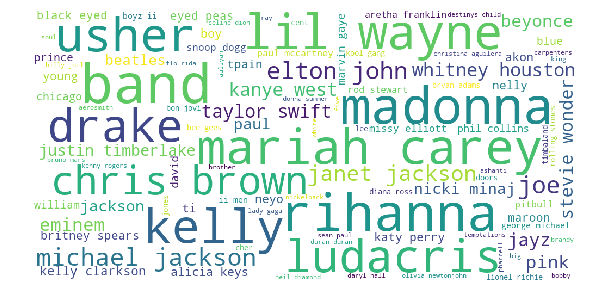

In [15]:
allwords = ' '.join(df['Artist']).lower().replace('featuring', '')
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=100,
                            relative_scaling=.5).generate(allwords)

plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(cloud);

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop = stopwords.words('english')

In [18]:
##Remove Stop words

In [19]:
df['Cleaned_Lyrics'] = df['Lyrics'].str.lower().str.split()

In [20]:
df['Cleaned_Lyrics'] = df['Cleaned_Lyrics'].apply(lambda x : [item for item in x if item not in stop])

In [21]:
##POS tagging

In [22]:
from nltk.tag import pos_tag

In [23]:
def Getting_NN(sentence):
   sentence=sentence.lower()
   cleaned=' '.join([w for w in sentence.split() if not w in stop]) 
   cleaned=' '.join([w for w , pos in pos_tag(cleaned.split()) if (pos == 'NN'  )])
   cleaned=cleaned.strip()
   return cleaned
df['pos_tag_NN']= df['Lyrics'].apply(lambda x:Getting_NN(x))

In [25]:
def Getting_JJR(sentence):
   sentence=sentence.lower()
   cleaned=' '.join([w for w in sentence.split() if not w in stop]) 
   cleaned=' '.join([w for w , pos in pos_tag(cleaned.split()) if (pos == 'JJR'  )])
   cleaned=cleaned.strip()
   return cleaned

df['pos_tag_JJR']= df['Lyrics'].apply(lambda x:Getting_JJR(x))

In [26]:
#Count Length of the strings
df['ly_count'] = df['Lyrics'].str.split(" ").str.len()
df['NN_count'] = df['pos_tag_NN'].str.split(" ").str.len()

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

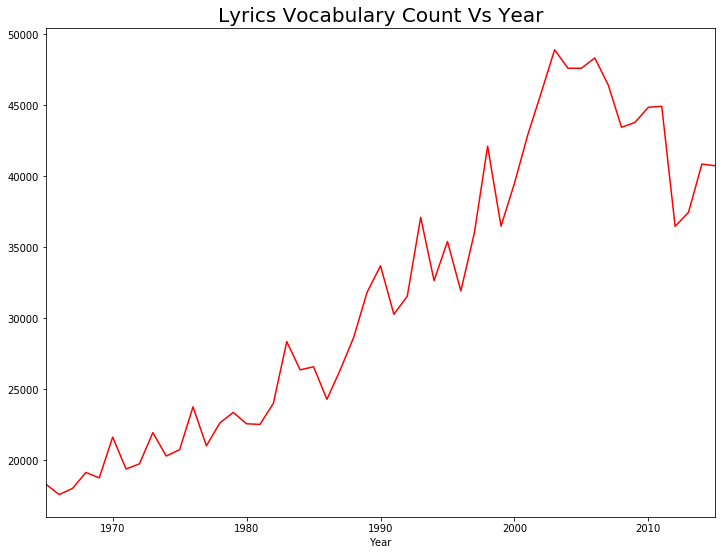

In [28]:
Total_year_count = df.groupby(['Year'])['ly_count'].sum()
plt.figure(figsize=(12,9))
plt.title("Lyrics Vocabulary Count Vs Year",fontsize=20)
Total_year_count.plot(kind='line',color="Red")

In [31]:
Total_year_count.to_csv('vocab_count.csv')

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


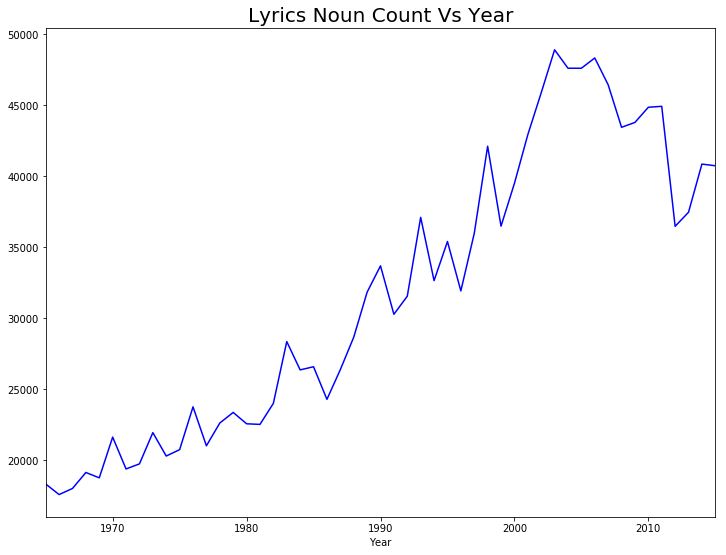

In [32]:
Noun_year_count = df.groupby(['Year'])['NN_count'].sum()
plt.figure(figsize=(12,9))
plt.title("Lyrics Noun Count Vs Year",fontsize=20)
Total_year_count.plot(kind='line',color="Blue")

In [33]:
Noun_year_count.to_csv('noun.csv')

C:\Users\supre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [34]:
def Getting_JJ(sentence):
   sentence=sentence.lower()
   cleaned=' '.join([w for w in sentence.split() if not w in stop]) 
   cleaned=' '.join([w for w , pos in pos_tag(cleaned.split()) if (pos == 'JJ'  )])
   cleaned=cleaned.strip()
   return cleaned

df['pos_tag_JJ']= df['Lyrics'].apply(lambda x:Getting_JJ(x))

In [35]:
df['JJR_count'] = df['pos_tag_JJR'].str.split(" ").str.len()

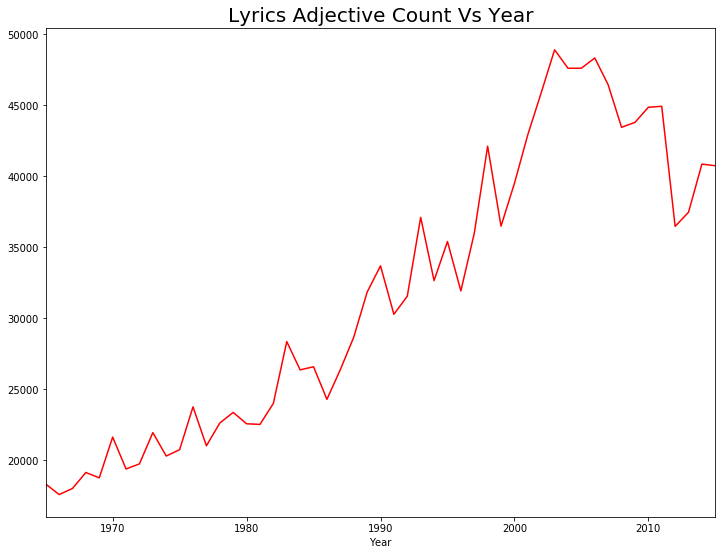

In [36]:
Adj_year_count = df.groupby(['Year'])['JJR_count'].sum()
plt.figure(figsize=(12,9))
plt.title("Lyrics Adjective Count Vs Year",fontsize=20)
Total_year_count.plot(kind='line',color="Red")

# MOST COMMON PHRASES OF THE DECADE

In [65]:
s60 = [1965,1966,1967,1968,1969,1970] 

In [67]:
df_60 = df[df.Year.isin(s60)]

In [87]:
df_60.describe()

,Rank,Year,Source,ly_count,NN_count,JJ_count
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,49.845884,1967.499124,2.050788,198.788091,39.362522,18.952715
std,28.831222,1.712057,1.131314,82.181777,21.377967,11.919299
min,1.000000,1965.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,1966.000000,1.000000,151.000000,25.000000,11.000000
50%,50.000000,1967.000000,1.000000,189.000000,36.000000,17.000000
75%,74.500000,1969.000000,3.000000,242.500000,50.000000,24.000000
max,100.000000,1970.000000,5.000000,657.000000,174.000000,125.000000


In [71]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [76]:
# Lematization 
# exa = word_tokenize(filter_sentence)
stem_sentence = []
for w in df['Cleaned_Lyrics'][0]:
    stemText = ps.stem(w)
    stem_sentence.append(stemText)

In [84]:
words_60 = ' '.join(df_60['Cleaned_Lyrics']).lower().replace('', '')
cloud = wordcloud.WordCloud(background_color='white',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=100,
                            relative_scaling=.5).generate(words_60)

plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(cloud);

TypeError: sequence item 0: expected str instance, list found

TypeError: sequence item 0: expected str instance, list found

In [118]:
lyrics_60 = df_60['Cleaned_Lyrics'].dropna()

In [119]:
lyrics_60 = list(filter(None, lyrics_60))

In [132]:
len(lyrics_60)

558